# Hands-on Exercise CLASS Module

In [1]:
!pip install --user mlxtend

In [2]:
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble Methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier

#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions

In [3]:
# Generating Data1

np.random.seed(100)

a = np.random.multivariate_normal([2,2],[[0.5,0], [0,0.5]], 200)
b = np.random.multivariate_normal([4,4],[[0.5,0], [0,0.5]], 200)

Data1_X = np.vstack((a,b))
Data1_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data2

np.random.seed(100)

a1 = np.random.multivariate_normal([2,2],[[0.25,0], [0,0.25]],200)
a2 = np.random.multivariate_normal([2,4],[[0.25,0], [0,0.25]],200)
a3 = np.random.multivariate_normal([4,2],[[0.25,0], [0,0.25]],200)
a4 = np.random.multivariate_normal([4,4],[[0.25,0], [0,0.25]],200)

Data2_X = np.vstack((a1,a4,a2,a3))
Data2_Y = np.hstack((np.ones(400).T,np.zeros(400).T)).astype(int)


# Generating Data3

np.random.seed(100)

a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])

Data3_X = np.vstack((a1,a2))
Data3_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data4

np.random.seed(100)

Data4_X = np.random.uniform(0,12,[500,2])
Data4_Y = np.ones([500]).astype(int)
Data4_Y[np.multiply(Data4_X[:,0],Data4_X[:,0]) + np.multiply(Data4_X[:,1],Data4_X[:,1]) - 100 < 0 ] = 0

### 1. Decision Tree

Use __Data3__ to answer the following questions.

<span style="color:red">**Question 1a:** </span> Compute and print the 10-fold cross-validation accuracy using decision tree classifiers with max_depth = 2,4,6,8,10, and 50. 

In [4]:
dt_2 = DecisionTreeClassifier(max_depth=2)
dt_4 = DecisionTreeClassifier(max_depth=4)
dt_6 = DecisionTreeClassifier(max_depth=6)
dt_8 = DecisionTreeClassifier(max_depth=8)
dt_10 = DecisionTreeClassifier(max_depth=10)
dt_50 = DecisionTreeClassifier(max_depth=50)

dt_scores_2 = cross_val_score(dt_2, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(dt_scores_2)
print([dt_scores_2.mean(), dt_scores_2.std(), dt_scores_2.min(),dt_scores_2.max()])

dt_scores_4 = cross_val_score(dt_4, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(dt_scores_4)
print([dt_scores_4.mean(), dt_scores_4.std(), dt_scores_4.min(),dt_scores_4.max()])

dt_scores_6 = cross_val_score(dt_6, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(dt_scores_6)
print([dt_scores_6.mean(), dt_scores_6.std(), dt_scores_6.min(),dt_scores_6.max()])

dt_scores_8 = cross_val_score(dt_8, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(dt_scores_8)
print([dt_scores_8.mean(), dt_scores_8.std(), dt_scores_8.min(),dt_scores_8.max()])

dt_scores_10 = cross_val_score(dt_10, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(dt_scores_10)
print([dt_scores_10.mean(), dt_scores_10.std(), dt_scores_10.min(),dt_scores_10.max()])

dt_scores_50 = cross_val_score(dt_50, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(dt_scores_50)
print([dt_scores_50.mean(), dt_scores_50.std(), dt_scores_50.min(),dt_scores_50.max()])

[0.8   0.9   0.9   0.875 0.925 0.875 0.9   0.85  0.85  0.875]
[0.875, 0.03354101966249685, 0.8, 0.925]
[0.95  0.975 0.975 0.975 1.    1.    0.975 0.925 0.975 0.95 ]
[0.97, 0.021794494717703363, 0.925, 1.0]
[0.95  0.975 0.975 0.975 1.    1.    0.95  0.925 0.975 0.95 ]
[0.9674999999999999, 0.0225, 0.925, 1.0]
[0.95  0.975 0.95  0.95  1.    0.975 0.9   0.875 0.975 0.95 ]
[0.9499999999999998, 0.03535533905932737, 0.875, 1.0]
[0.925 0.95  0.95  0.95  1.    0.975 0.9   0.875 0.95  0.95 ]
[0.9424999999999999, 0.03363406011768426, 0.875, 1.0]
[0.925 0.975 0.925 0.95  1.    0.975 0.925 0.9   0.95  0.925]
[0.9450000000000001, 0.02915475947422648, 0.9, 1.0]


<span style="color:red">**Question 1b:** </span> For what values of max_depth did you observe the lowest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:** </span> for DT max_depth = 2, we observed the lowest accuracy. The phenomena is called under-fitting. 

<span style="color:red">**Question 1c:** </span> What accuracy did you observe for max depth=50? What is the difference between this accuracy and the highest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:** </span>  for max depth = 50, the accuracy is 94.5%. Highest accuracy was for max depth = 4 which is 97%. Difference = 2.5%. Accuracy is falling as we are increasing depth because of over fitting.

<span style="color:red">**Question 1d:** </span> Plot decision regions for the above decision tree models

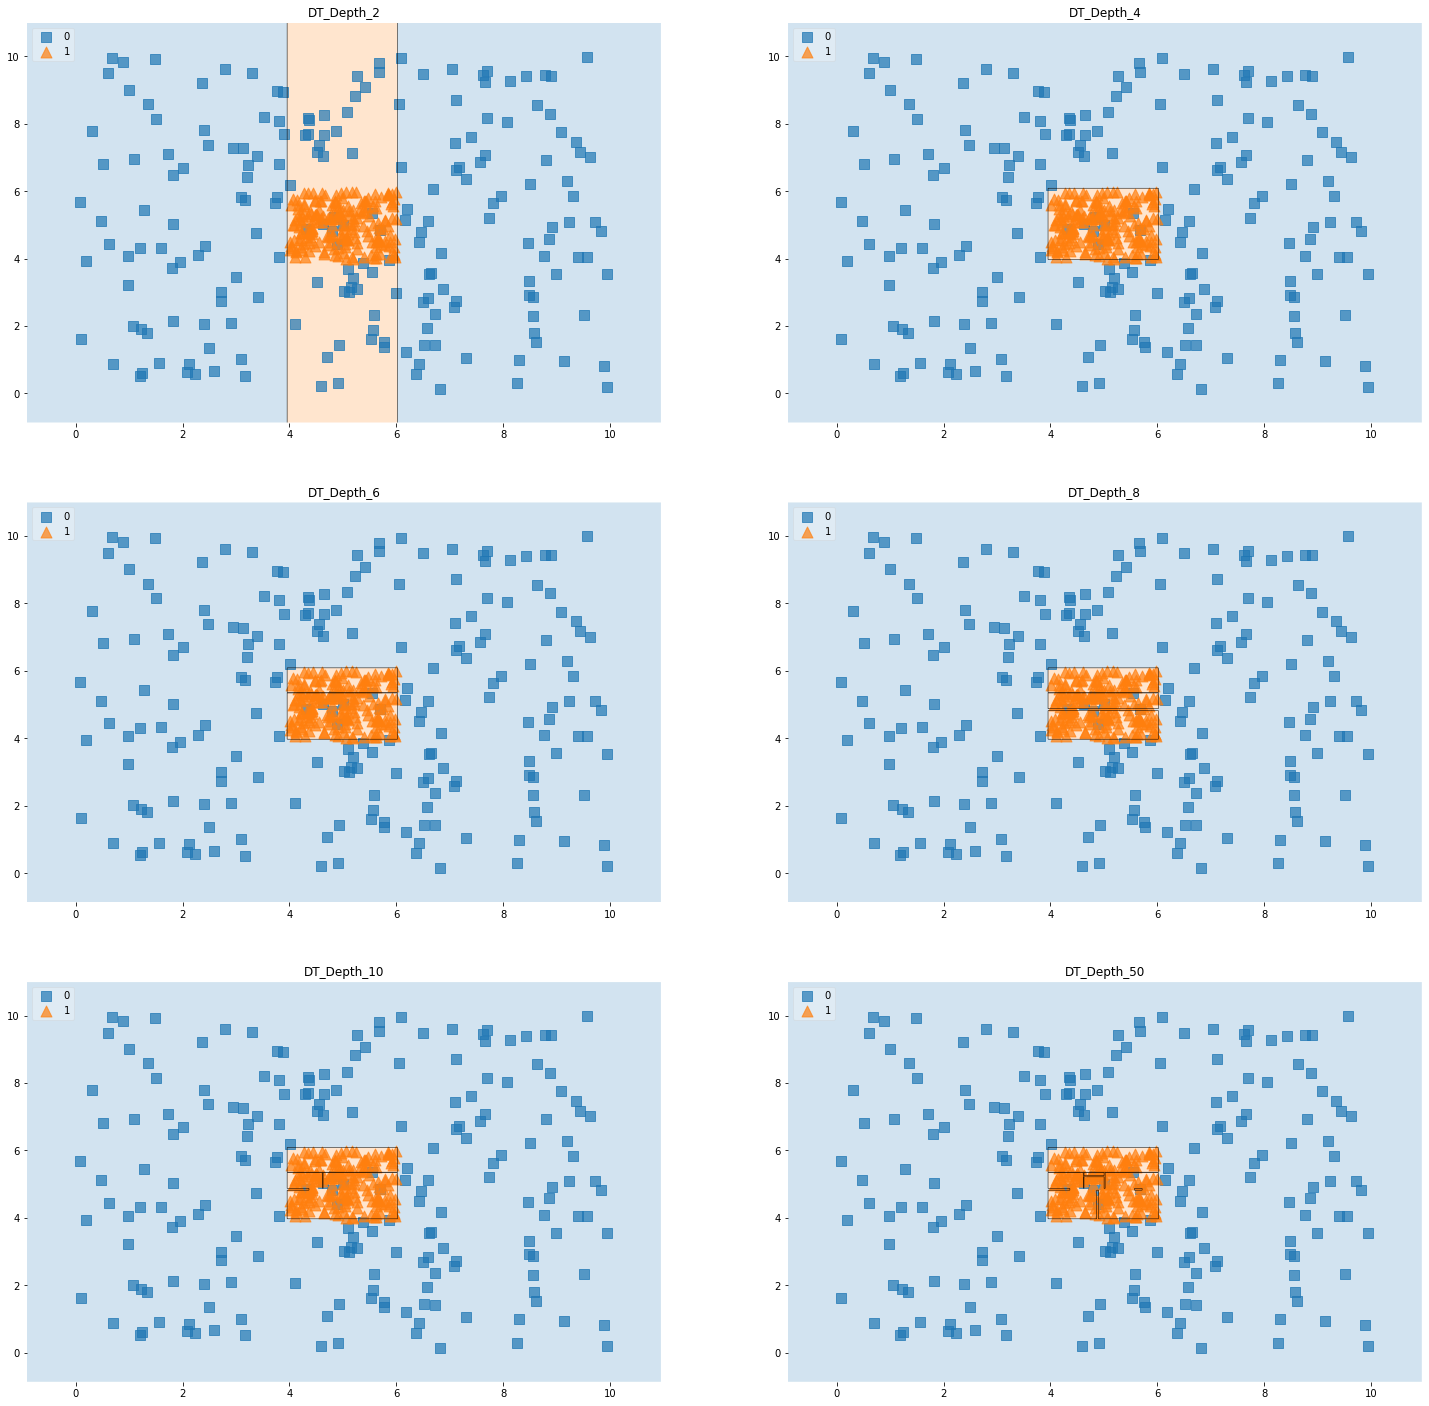

In [5]:
# Creating a list of classifiers and their names for plotting
clf_list = [dt_2,dt_4,dt_6,dt_8,dt_10,dt_50]
labels = ['DT_Depth_2','DT_Depth_4','DT_Depth_6','DT_Depth_8','DT_Depth_10','DT_Depth_50']

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# Plotting the decision boundaries
fig = plt.figure(figsize=(25,25))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data3_X, Data3_Y)
    ax = plt.subplot(3,2,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)

plt.show()

<span style="color:red">**Question 1e:** </span> Based on the decision regions, which depth is better suited for this data? Explain your reason.

<span style="color:green">**Answer:** </span> Depth = 4 seems to be the best suited. Because for depth less than 4 is underfitting and depth more than 4 is overfiting. For DT=2, we can see an orange region covering blue points and for depths greater than 4 we can see blue points are classified under orange region. At depth = 4 we are getting the generalized model which is neither underfitting or overfitting

### 2. k Nearest Neighbor

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 2a:** </span>
 Compute and print the 10-fold cross-validation accuracy for a kNN classifier with n_neighbors = 1, 5, 10, 50

In [77]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_50 = KNeighborsClassifier(n_neighbors=50)

knn_scores_1 = cross_val_score(knn_1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(knn_scores_1)
print(knn_scores_1.mean())

knn_scores_5 = cross_val_score(knn_5, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(knn_scores_5)
print(knn_scores_5.mean())

knn_scores_10 = cross_val_score(knn_10, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(knn_scores_10)
print(knn_scores_10.mean())

knn_scores_50 = cross_val_score(knn_50, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(knn_scores_50)
print(knn_scores_50.mean())

[0.925  0.8875 0.925  0.8875 0.925  0.9375 0.8875 0.925  0.9375 0.8875]
0.9125
[0.9875 0.9125 0.925  0.9125 0.95   0.95   0.8625 0.95   0.9625 0.9375]
0.9349999999999999
[0.9875 0.9    0.95   0.925  0.9625 0.95   0.8625 0.9375 0.9625 0.9625]
0.9400000000000001
[0.9875 0.9    0.9625 0.9125 0.9625 0.9375 0.8875 0.9375 0.9625 0.9625]
0.9412499999999999


<span style="color:red">**Question 2b:** </span> For what values of n_neighbors did you observe the lowest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:** </span> Lowest accuracy is observed for n_neighbors = 1 which is 91.25%. This is overfitting the data because it is taking only one point in consideration to classify the data.

<span style="color:red">**Question 2c:** </span>  Plot decision regions for a kNN classifier with n_neighbors = 1, 5, 10, 50

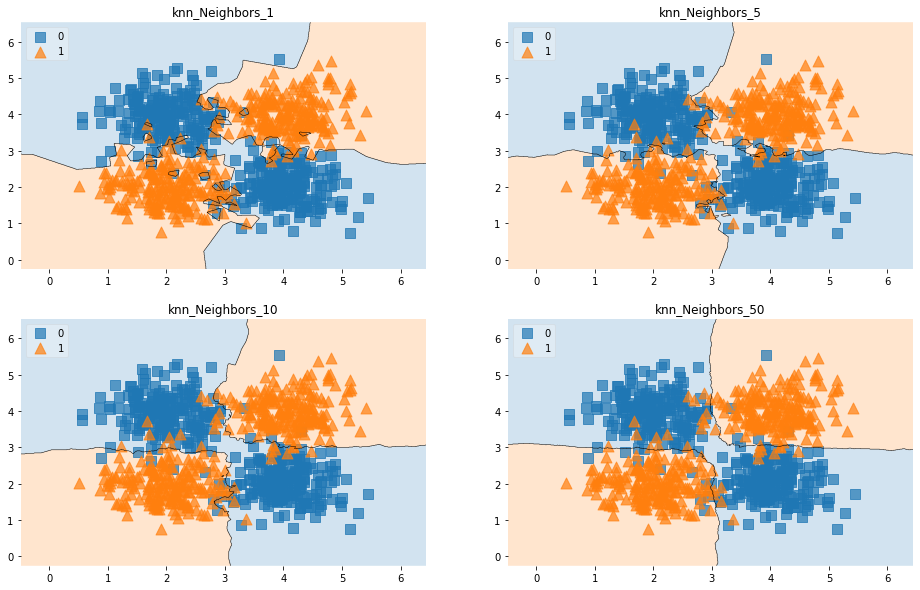

In [9]:
# Creating a list of classifiers and their names for plotting
clf_list_1 = [knn_1,knn_5,knn_10,knn_50]
labels = ['knn_Neighbors_1','knn_Neighbors_5','knn_Neighbors_10','knn_Neighbors_50']

# Plotting the decision boundaries
fig = plt.figure(figsize=(16,10))
count = 0;

for clf, label in zip(clf_list_1, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)

plt.show()

<span style="color:red">**Question 2d:** </span>  From the plots for __Question 2c__ what do you notice about the nature of decision boundary as the n_neighbors are increasing.

<span style="color:green">**Answer:** </span> We are seeing an increase in accuracy as we are increasing the n-neighbors. The decision boundaries are becoming more general and appropriate for classification, for low values of n neighbors it is overfitting the data. As observed for the 4 decision boundaries, as the number of k neighbors the classifier is becoming better.

### 3. Naive Bayes

<span style="color:red">**Question 3a:** </span> Compute and print the 10-fold cross-validation accuracy for a NB classifier on all four datasets: Data1, Data2, Data3, Data4

In [11]:
nb = GaussianNB()

In [78]:
nb_scores_1 = cross_val_score(nb, Data1_X, Data1_Y, cv=10, scoring='accuracy')
print(nb_scores_1)
print(nb_scores_1.mean())

nb_scores_2 = cross_val_score(nb, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(nb_scores_2)
print(nb_scores_2.mean())

nb_scores_3 = cross_val_score(nb, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(nb_scores_3)
print(nb_scores_3.mean())

nb_scores_4 = cross_val_score(nb, Data4_X, Data4_Y, cv=10, scoring='accuracy')
print(nb_scores_4)
print(nb_scores_4.mean())

[0.975 1.    1.    0.925 0.95  0.975 0.975 0.9   0.975 1.   ]
0.9675
[0.075  0.0625 0.0125 0.0875 0.0875 0.025  0.05   0.05   0.0125 0.0375]
0.049999999999999996
[1.    0.95  0.975 0.975 0.975 0.975 0.925 0.9   0.975 0.95 ]
0.96
[0.90196078 1.         0.98       0.98       0.98       0.96
 0.94       0.96       0.97959184 0.95918367]
0.9640736294517807


<span style="color:red">**Question 3b:** </span> State your observations on the datasets the NB algorithm performed poorly.

<span style="color:green">**Answer:** </span> The NB algorithm performed poorly on Data Set 2 with an accuracy of 4.9%. Naive Bayes assumes no correlation between the two classes and this assumption is violated here as the classes in Dataset 2 are co-related. 

<span style="color:red">**Question 3c:** </span> Plot decision regions for a NB classifier on each of the four datasets

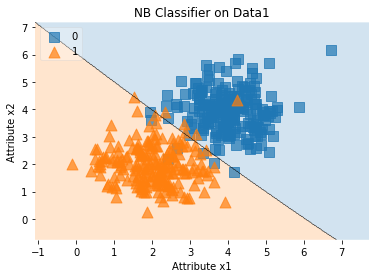

In [17]:
nb.fit(Data1_X, Data1_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data1_X, y=Data1_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('NB Classifier on Data1')
plt.show()

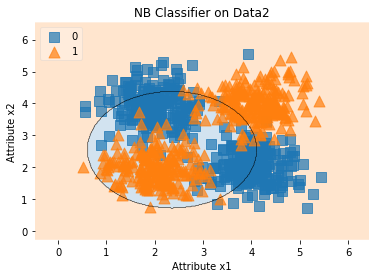

In [16]:
nb.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('NB Classifier on Data2')
plt.show()

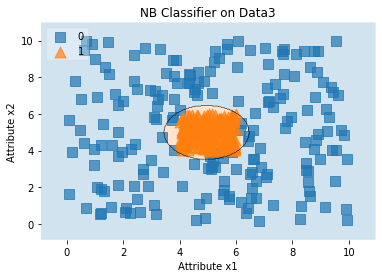

In [18]:
nb.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('NB Classifier on Data3')
plt.show()

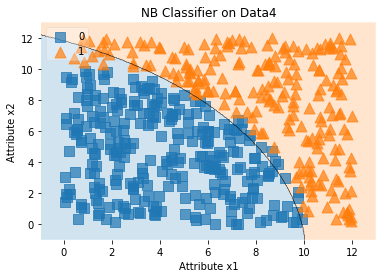

In [24]:
nb.fit(Data4_X, Data4_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data4_X, y=Data4_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('NB Classifier on Data4')
plt.show()

<span style="color:red">**Question 3d:** </span> Describe the shape of the decision boundary on all four datasets. Explain the reason.

<span style="color:green">**Answer:** </span>  The decision boundary on the first data set is linear as we can see the data points in the two classes are linearly separable. The decision boundary for the second data set is ellipse but since the classes have co-relation the nb classifier is failing here. The decision boundary for the third data set is ellipse as well but since the independence assumption of nb is followed we can see that nb is able to classify data points in two classes. In the last dataset, we can see a polynomial decision boundary separating the two classes because the classes are independent for the data set and requires a polynomial curve for seperation.

<span style="color:red">**Question 3e:** </span> Based on your plots in __Question 3c__ explain the poor performance of NB on some datasets.

<span style="color:green">**Answer:** </span>  The NB algorithm performed poorly on Data Set 2 as seen in the visualization. It has an accuracy of 4.9%. Naive Bayes assumes no correlation between the two classes and this assumption is violated here as the classes in Dataset 2 are co-related.

### 4. Support Vector Machines (Linear)

<span style="color:red">**Question 4a:** </span>  Based on the visualization of the four datasets, assess how well a linear SVM is expected to perform. Specifically, rank the datasets in the order of decreasing accuracy when a linear SVM is used. No need to compute accuracy to answer this question.

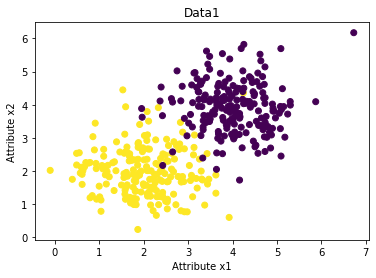

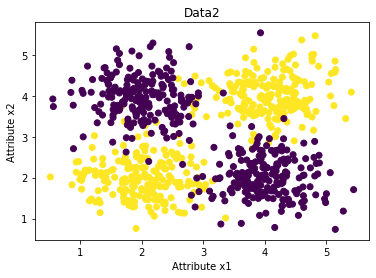

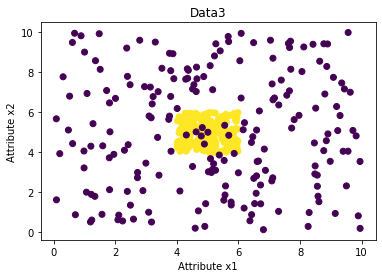

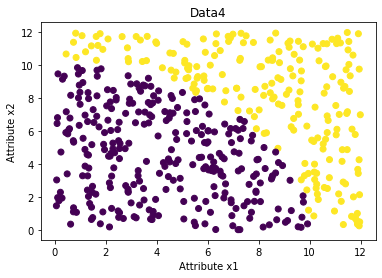

In [21]:
plt.scatter(Data1_X[:,0],Data1_X[:,1], c=Data1_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data1')
plt.show()

plt.scatter(Data2_X[:,0],Data2_X[:,1], c=Data2_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data2')
plt.show()

plt.scatter(Data3_X[:,0],Data3_X[:,1], c=Data3_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data3')
plt.show()

plt.scatter(Data4_X[:,0],Data4_X[:,1], c=Data4_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data4')
plt.show()

<span style="color:green">**Answer:** </span> For linear SVM to work the data points for the two classes should be as separable as possible. As per the separation seen for the above data points we can speculate the performance of the linear SVM on the points as follow - performance ordered from best to worst - Dataset 1 > Dataset 4 > Dataset 3 > Dataset 2. In data set 3 the points of a class are not located all over the space hence making it preferable over dataset 2 for linear SVM case.


<span style="color:red">**Question 4b:** </span>  Compute and print the 10-fold cross-validation accuracy for a linear SVM classifier on all four datasets: Data1, Data2, Data3, Data4

In [25]:
svm_linear = SVC(C=0.5, kernel='linear')

In [36]:
svm_linear_scores_1 = cross_val_score(svm_linear, Data1_X, Data1_Y, cv=10, scoring='accuracy')
print(svm_linear_scores_1)
print([svm_linear_scores_1.mean(), svm_linear_scores_1.std()])

svm_linear_scores_2 = cross_val_score(svm_linear, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_linear_scores_2)
print([svm_linear_scores_2.mean(), svm_linear_scores_2.std()])

svm_linear_scores_3 = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(svm_linear_scores_3)
print([svm_linear_scores_3.mean(), svm_linear_scores_3.std()])

svm_linear_scores_4 = cross_val_score(svm_linear, Data4_X, Data4_Y, cv=10, scoring='accuracy')
print(svm_linear_scores_4)
print([svm_linear_scores_4.mean(), svm_linear_scores_4.std()])

[0.975 1.    1.    0.95  0.95  0.95  0.975 0.9   0.975 1.   ]
[0.9674999999999999, 0.02968585521759479]
[0.125  0.1375 0.0125 0.0875 0.2    0.2375 0.1    0.15   0.1875 0.175 ]
[0.14125000000000001, 0.06124999999999999]
[0.625 0.625 0.65  0.6   0.65  0.7   0.65  0.675 0.625 0.625]
[0.6425000000000001, 0.0275]
[0.94117647 0.90196078 0.92       0.92       0.98       0.92
 0.94       0.92       0.95918367 0.85714286]
[0.9259463785514207, 0.03147481962633185]


<span style="color:red">**Question 4c:** </span> Rank the datasets in the decreasing order of accuracy of SVM.

<span style="color:green">**Answer:** </span> Dataset 1 > Dataset 4 > Dataset 3 > Dataset 2


<span style="color:red">**Question 4d:** </span>  Plot decision regions for a linear SVM classifier on each of the four datasets


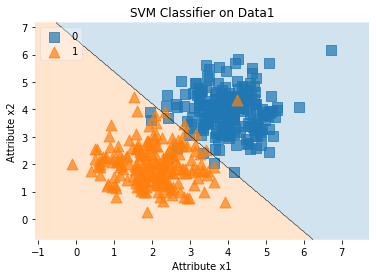

In [30]:
svm_linear.fit(Data1_X, Data1_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data1_X, y=Data1_Y, clf=svm_linear,legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM Classifier on Data1')
plt.show()

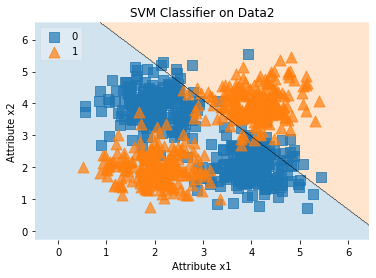

In [31]:
svm_linear.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM Classifier on Data2')
plt.show()

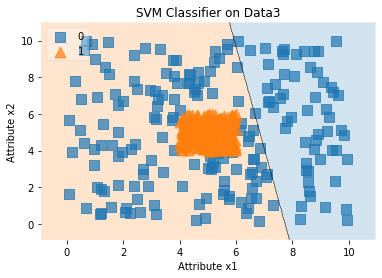

In [32]:
svm_linear.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM Classifier on Data3')
plt.show()

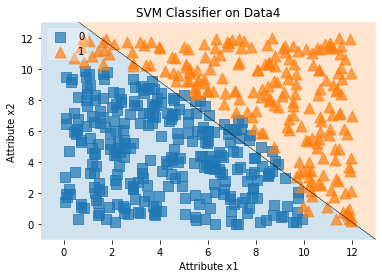

In [33]:
svm_linear.fit(Data4_X, Data4_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data4_X, y=Data4_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM Classifier on Data4')
plt.show()

<span style="color:red">**Question 4e:** </span>Explain the reason for your observations in __Question 4c__ using observations from the above decision regions.

<span style="color:green">**Answer:** </span> For linear SVM to work we need a separable case. The accuracies generated in 4c is tying back to the observation that we can make on the datasets with separation achieved the most in dataset 1 and least in datset 2.


### 5. Non-linear Support Vector Machines

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 5a:** </span>
Compute and print the 10-fold cross-validation accuracy for an SVM with a polynomial kernel and degree values 1, 2, and 3.

In [34]:
svm_poly_1 = SVC(C=0.5, kernel='poly',degree=1, gamma = 'auto')

svm_poly_scores_1 = cross_val_score(svm_poly_1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_poly_scores_1)
print([svm_poly_scores_1.mean(), svm_poly_scores_1.std()])

svm_poly_2 = SVC(C=0.5, kernel='poly',degree=2, gamma = 'auto')

svm_poly_scores_2 = cross_val_score(svm_poly_2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_poly_scores_2)
print([svm_poly_scores_2.mean(), svm_poly_scores_2.std()])

svm_poly_3 = SVC(C=0.5, kernel='poly',degree=3, gamma = 'auto')

svm_poly_scores_3 = cross_val_score(svm_poly_3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_poly_scores_3)
print([svm_poly_scores_3.mean(), svm_poly_scores_3.std()])

[0.1375 0.125  0.0125 0.0875 0.175  0.1875 0.1    0.1625 0.1875 0.1625]
[0.13375, 0.05215661511256266]
[0.8125 0.8375 0.8875 0.8375 0.8875 0.8875 0.8625 0.8875 0.9125 0.8375]
[0.865, 0.030516389039334235]
[0.825  0.875  0.8875 0.8625 0.925  0.9    0.8625 0.8875 0.8875 0.85  ]
[0.8762500000000001, 0.026487025125521375]


<span style="color:red">**Question 5b:** </span> Rank the polynomial kernels in decreasing order of accuracy.

<span style="color:green">**Answer:** </span> Oder of Accuracy : Poly 3 > Poly 2 > Poly 1


<span style="color:red">**Question 5c:** </span>  Plot decision regions for a polynomial kernel SVM with degree values 1, 2, and 3.

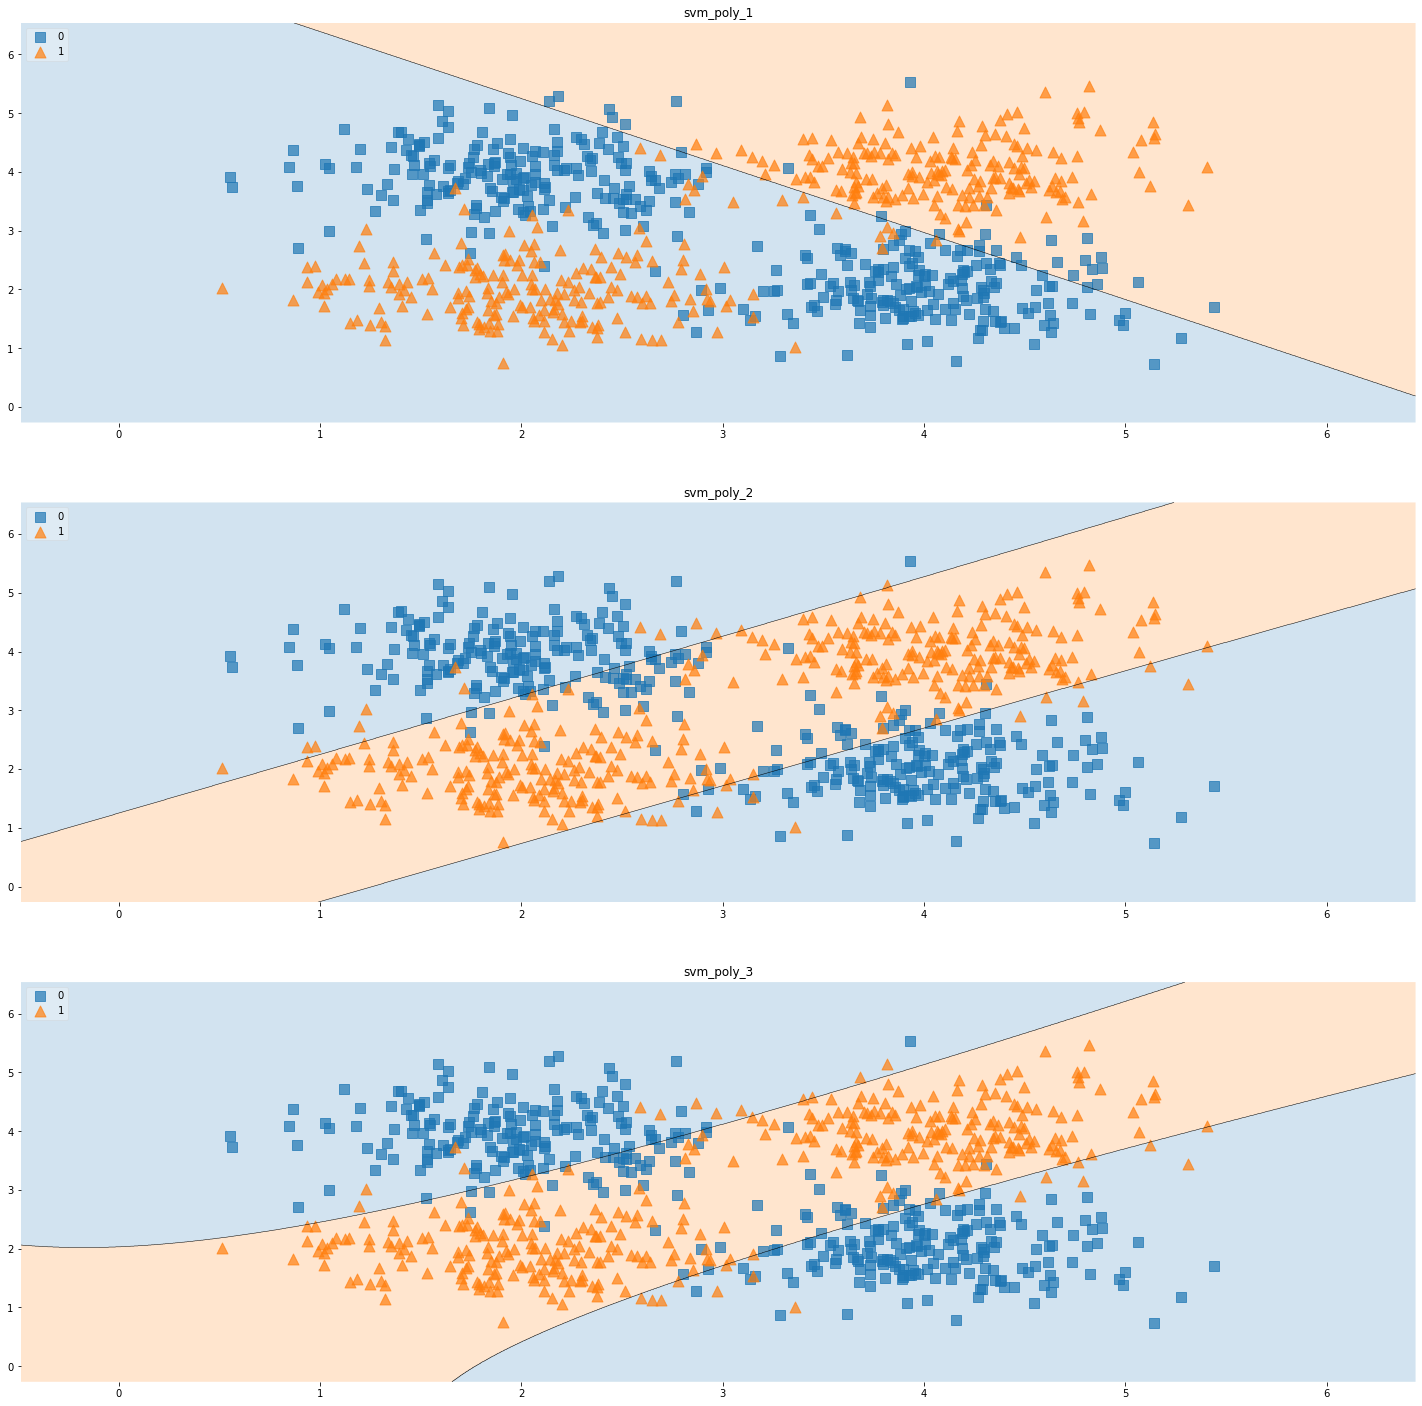

In [41]:
# Creating a list of classifiers and their names for plotting
clf_list_2 = [svm_poly_1, svm_poly_2, svm_poly_3]
labels_2 = ['svm_poly_1','svm_poly_2','svm_poly_3']

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# Plotting the decision boundaries
fig = plt.figure(figsize=(25,25))
count = 0;

for clf, label in zip(clf_list_2, labels_2):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(3,1,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)

plt.show()

<span style="color:red">**Question 5d:** </span> Based on the decision regions, explain the reason for your observations in __Question 5c__.

<span style="color:green">**Answer:** </span> As we are increasing the degree, we are able to create more non linear/ smooth boundaries and this is resulting in less misclassification of the points making poly 3 better than poly 2 which is again better than poly 1 due to higher degree.



<span style="color:red">**Question 5e:** </span>  Compute the 10-fold cross-validation accuracy for an SVM with an RBF kernel and gamma values 0.01, 0.1, and 1.

In [79]:
svm_rbf_1 = SVC(C = 0.5, kernel='rbf', gamma=0.01) 

svm_rbf_scores_1 = cross_val_score(svm_rbf_1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_rbf_scores_1)
print([svm_rbf_scores_1.mean(), svm_rbf_scores_1.std()])

svm_rbf_2 = SVC(C = 0.5, kernel='rbf', gamma=0.1) 

svm_rbf_scores_2 = cross_val_score(svm_rbf_2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_rbf_scores_2)
print([svm_rbf_scores_2.mean(), svm_rbf_scores_2.std()])

svm_rbf_3 = SVC(C = 0.5, kernel='rbf', gamma=1) 

svm_rbf_scores_3 = cross_val_score(svm_rbf_3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_rbf_scores_3)
print([svm_rbf_scores_3.mean(), svm_rbf_scores_3.std()])

[0.375  0.3125 0.0875 0.25   0.4375 0.3375 0.3    0.3    0.275  0.3375]
[0.30124999999999996, 0.08704345179276841]
[0.975  0.9    0.9375 0.9    0.9625 0.9375 0.8875 0.9375 0.9625 0.9625]
[0.93625, 0.02928843628464996]
[0.9875 0.9125 0.95   0.925  0.9625 0.9375 0.875  0.9375 0.9625 0.95  ]
[0.9399999999999998, 0.029474565306379]


<span style="color:red">**Question 5f:** </span> Rank the RBF kernels in decreasing order of accuracy.

<span style="color:green">**Answer:** </span> Decreasing order of accuracy for RBF kernels - Gamma = 1 > Gamma = 0.1 > Gamma = 0.01


<span style="color:red">**Question 5g:** </span>  Plot decision regions for the above RBF Kernels

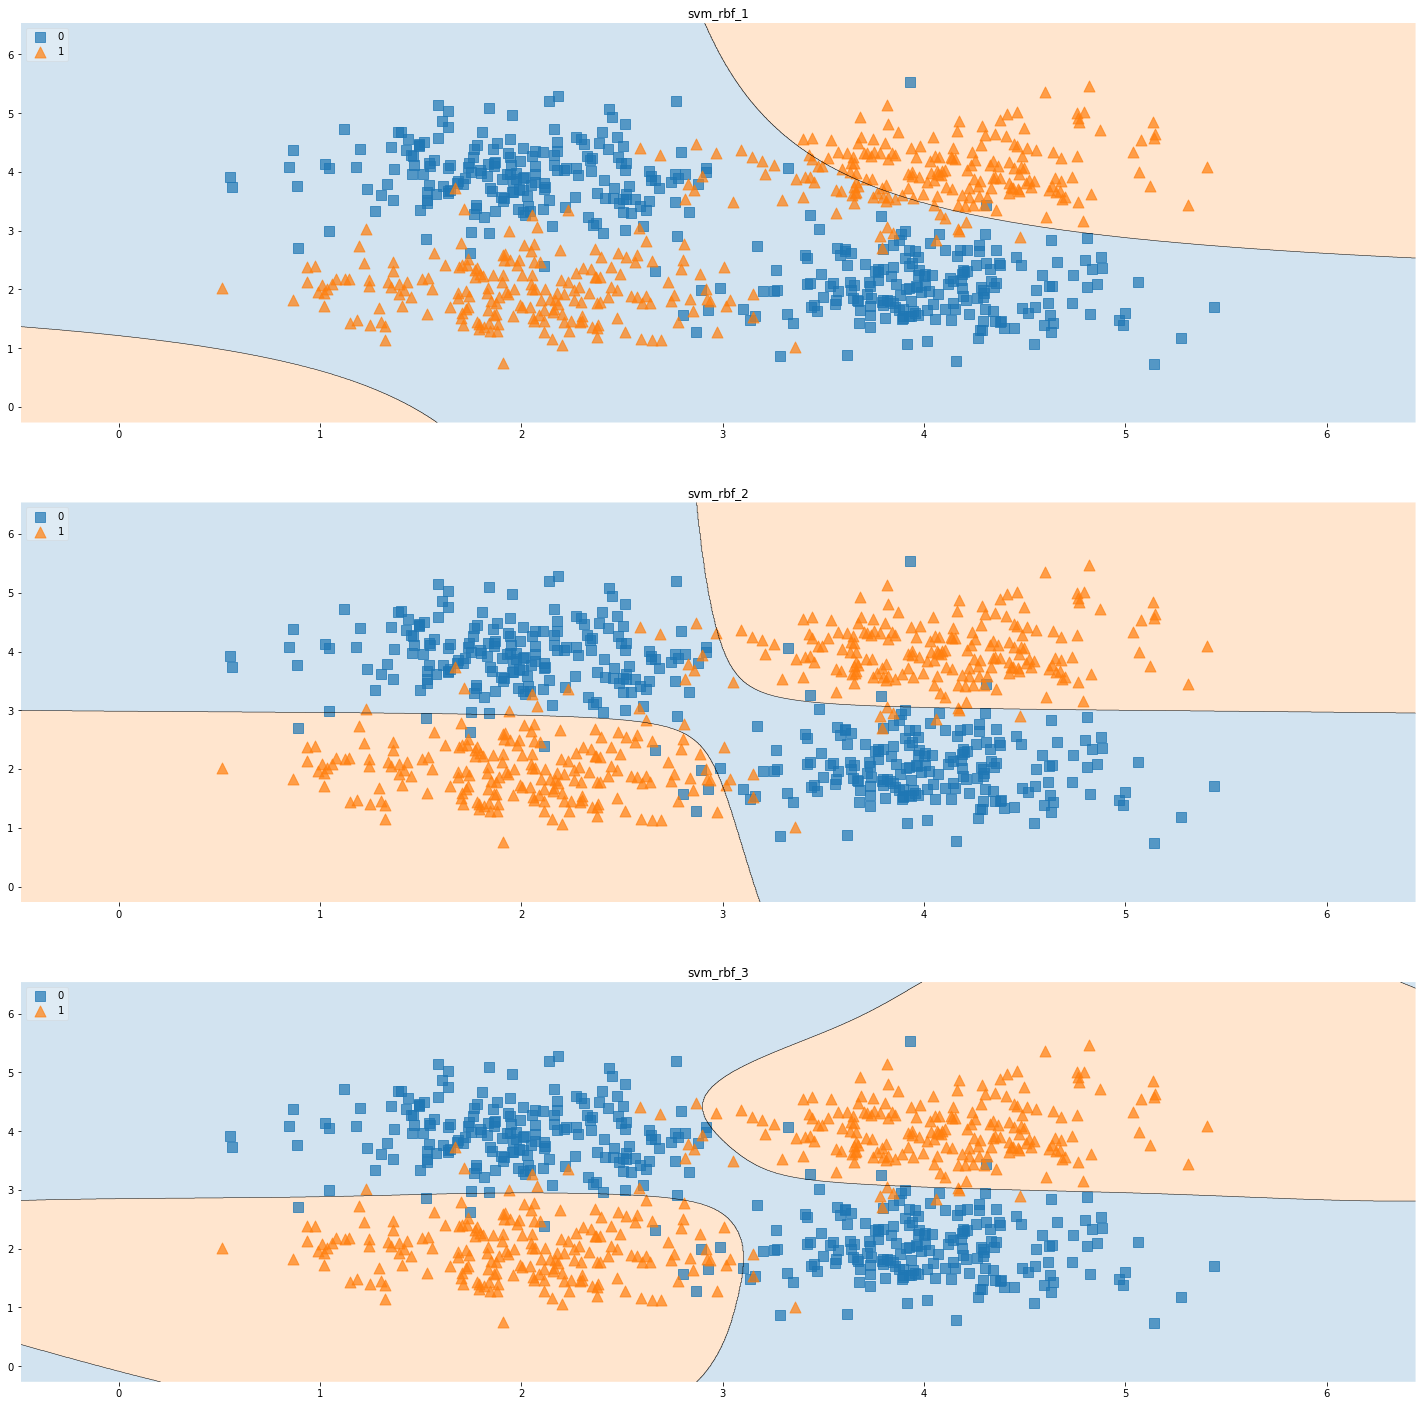

In [43]:
# Creating a list of classifiers and their names for plotting
clf_list_3 = [svm_rbf_1, svm_rbf_2, svm_rbf_3]
labels_3 = ['svm_rbf_1','svm_rbf_2','svm_rbf_3']

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# Plotting the decision boundaries
fig = plt.figure(figsize=(25,25))
count = 0;

for clf, label in zip(clf_list_3, labels_3):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(3,1,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)

plt.show()

<span style="color:red">**Question 5h:** </span>  Explain the reason for your observations in __Question 5f__ from the above decision regions.

<span style="color:green">**Answer:** </span> As we are increasing the gamma, we are able to create more non linear/ smooth boundaries and this is resulting in less misclassification of the points. Ordering : Gamma = 1 > Gamma = 0.1 > Gamma = 0.01




<span style="color:red">**Question 5i:** </span>  Between SVM with a Polynomial kernel and SVM with an RBF kernel, which one is ideally suited of Data2? Explain your reason.

<span style="color:green">**Answer:** </span> SVM with RBF kernel is suited over SVM with Polynomial kernel for Data 2 as we can it has a better accuracy and the plots show a better separation for RBF kernel.




### 6. Classification Evaluation

<span style="color:red">**Question 6a:** </span>

Run SVM classifier (with RBF kernel and gamma=0.1) on __Data2__ and compute the mean of k-fold cross-validation accuracies for cv = 3, 4, 5 and 6. Report the mean of accuracies for each choice of 'cv' and explain the reason for any differences in the mean accuracy you observe.

In [81]:
svm_rbf = SVC(C = 0.5, kernel='rbf', gamma=0.1) 

svm_rbf_scores_3 = cross_val_score(svm_rbf, Data2_X, Data2_Y, cv=3, scoring='accuracy')
print(svm_rbf_scores_3)
print([svm_rbf_scores_3.mean(), svm_rbf_scores_3.std()])

svm_rbf_scores_4 = cross_val_score(svm_rbf, Data2_X, Data2_Y, cv=4, scoring='accuracy')
print(svm_rbf_scores_4)
print([svm_rbf_scores_4.mean(), svm_rbf_scores_4.std()])

svm_rbf_scores_5 = cross_val_score(svm_rbf, Data2_X, Data2_Y, cv=5, scoring='accuracy')
print(svm_rbf_scores_5)
print([svm_rbf_scores_5.mean(), svm_rbf_scores_5.std()])

svm_rbf_scores_6 = cross_val_score(svm_rbf, Data2_X, Data2_Y, cv=6, scoring='accuracy')
print(svm_rbf_scores_6)
print([svm_rbf_scores_6.mean(), svm_rbf_scores_6.std()])

[0.87313433 0.93609023 0.90225564]
[0.903826731006621, 0.025725635665399284]
[0.91  0.92  0.895 0.94 ]
[0.91625, 0.0163458710382775]
[0.91875 0.9     0.95    0.9125  0.95625]
[0.9275, 0.02186606960566988]
[0.95522388 0.89552239 0.94776119 0.91044776 0.93939394 0.9469697 ]
[0.9325531433740389, 0.021831954406404414]


<span style="color:green">**Answer:** </span> As the k-fold is increasing the mean accuracy is increasing as well. This is because as the number of folds are increasing the mean is estimated from a number of means larger in number for a large k value as compared to a low k fold value making the estimate better.  As k is increasing we are increasing the number of samples which is eventually reducing the bias.

<span style="color:red">**Question 6b:** </span>

For DT, NB, kNN, Linear SVM, Polynomial Kernel SVM, and SVM with RBF kernel classifiers, compute the 30-fold crossvalidation __accuracies__ and __precision__ (use scoring='precision' when calling cross_val_score()) on __Data3__. Rank the classifiers based on accuracy and precision scores. Are the best classifiers ranked according to accuracy and precision the same? If not, explain the reason. 

For the classifiers, feel free to choose any parameter settings you prefer.

In [80]:
dt = DecisionTreeClassifier(max_depth=10)

dt_scores_30_A = cross_val_score(dt, Data3_X, Data3_Y, cv=30, scoring='accuracy')

print(dt_scores_30_A)
print([dt_scores_30_A.mean(), dt_scores_30_A.std(), dt_scores_30_A.min(),dt_scores_30_A.max()])

dt_scores_30_P = cross_val_score(dt, Data3_X, Data3_Y, cv=30, scoring='precision')

print(dt_scores_30_P)
print([dt_scores_30_P.mean(), dt_scores_30_P.std(), dt_scores_30_P.min(),dt_scores_30_P.max()])

[0.85714286 1.         1.         0.92857143 1.         1.
 0.92857143 0.92857143 1.         1.         0.85714286 1.
 1.         1.         1.         1.         0.92857143 1.
 0.78571429 0.92857143 0.91666667 0.83333333 1.         0.91666667
 0.91666667 0.91666667 1.         1.         1.         0.91666667]
[0.9519841269841272, 0.05932373783315029, 0.7857142857142857, 1.0]
[1.         1.         1.         0.875      1.         1.
 1.         0.875      1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.71428571 1.         0.85714286 0.83333333 1.         0.85714286
 0.85714286 1.         1.         1.         1.         0.85714286]
[0.9575396825396826, 0.07487917537279609, 0.7142857142857143, 1.0]


In [51]:
knn_30 = KNeighborsClassifier(n_neighbors=10)

knn_scores_30_A = cross_val_score(knn_30, Data3_X, Data3_Y, cv=30, scoring='accuracy')
print(knn_scores_30_A)
print(knn_scores_30_A.min(), knn_scores_30_A.std(), knn_scores_30_A.min(), knn_scores_30_A.max())

knn_scores_30_P = cross_val_score(knn_30, Data3_X, Data3_Y, cv=30, scoring='precision')
print(knn_scores_30_P)
print(knn_scores_30_P.min(), knn_scores_30_P.std(), knn_scores_30_P.min(), knn_scores_30_P.max())

[0.92857143 1.         0.92857143 0.85714286 1.         1.
 1.         0.92857143 0.92857143 0.92857143 1.         0.92857143
 0.92857143 0.92857143 1.         1.         0.92857143 1.
 0.71428571 1.         0.91666667 0.83333333 1.         0.91666667
 0.83333333 1.         1.         0.83333333 0.91666667 0.91666667]
0.7142857142857143 0.06785598253904462 0.7142857142857143 1.0
[0.875      1.         0.875      0.77777778 1.         1.
 1.         0.875      0.875      0.875      1.         0.875
 0.875      0.875      1.         1.         0.875      1.
 0.63636364 1.         0.85714286 0.75       1.         0.85714286
 0.75       1.         1.         0.75       0.85714286 0.85714286]
0.6363636363636364 0.09744735226908663 0.6363636363636364 1.0


In [48]:
nb = GaussianNB()

nb_scores_30_A = cross_val_score(nb, Data3_X, Data3_Y, cv=30, scoring='accuracy')
print(nb_scores_30_A)
print([nb_scores_30_A.mean(), nb_scores_30_A.std(), nb_scores_30_A.min(), nb_scores_30_A.max()])

nb_scores_30_P = cross_val_score(nb, Data3_X, Data3_Y, cv=30, scoring='precision')
print(nb_scores_30_P)
print([nb_scores_30_P.mean(), nb_scores_30_P.std(), nb_scores_30_P.min(), nb_scores_30_P.max()])

[1.         1.         0.92857143 0.92857143 1.         1.
 1.         0.92857143 1.         0.92857143 1.         1.
 0.92857143 1.         1.         1.         0.92857143 1.
 0.78571429 1.         0.91666667 0.83333333 1.         0.91666667
 0.91666667 1.         1.         0.91666667 1.         0.91666667]
[0.9591269841269843, 0.05444033720451033, 0.7857142857142857, 1.0]
[1.         1.         0.875      0.875      1.         1.
 1.         0.875      1.         0.875      1.         1.
 0.875      1.         1.         1.         0.875      1.
 0.7        1.         0.85714286 0.75       1.         0.85714286
 0.85714286 1.         1.         0.85714286 1.         0.85714286]
[0.9328571428571429, 0.08427057975500643, 0.7, 1.0]


In [49]:
svm_linear = SVC(C=0.5, kernel='linear')

svm_linear_scores_30_A = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=30, scoring='accuracy')
print(svm_linear_scores_30_A)
print([svm_linear_scores_30_A.mean(), svm_linear_scores_30_A.std()])

svm_linear_scores_30_P = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=30, scoring='precision')
print(svm_linear_scores_30_P)
print([svm_linear_scores_30_P.mean(), svm_linear_scores_30_P.std()])

[0.57142857 0.71428571 0.5        0.64285714 0.64285714 0.64285714
 0.71428571 0.5        0.71428571 0.5        0.64285714 0.64285714
 0.57142857 0.71428571 0.78571429 0.64285714 0.64285714 0.78571429
 0.5        0.71428571 0.58333333 0.66666667 0.75       0.66666667
 0.66666667 0.66666667 0.58333333 0.58333333 0.66666667 0.66666667]
[0.6428571428571429, 0.07824607964359515]
[0.53846154 0.63636364 0.5        0.58333333 0.58333333 0.58333333
 0.63636364 0.5        0.63636364 0.5        0.58333333 0.58333333
 0.53846154 0.63636364 0.7        0.58333333 0.58333333 0.7
 0.5        0.63636364 0.54545455 0.6        0.66666667 0.6
 0.6        0.6        0.54545455 0.54545455 0.6        0.6       ]
[0.5881701631701632, 0.05332344458927299]


In [50]:
svm_poly_30 = SVC(C=0.5, kernel='poly',degree=1, gamma = 'auto')

svm_poly_scores_30_A = cross_val_score(svm_poly_30, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(svm_poly_scores_30_A)
print([svm_poly_scores_30_A.mean(), svm_poly_scores_30_A.std()])

svm_poly_scores_30_P = cross_val_score(svm_poly_30, Data3_X, Data3_Y, cv=10, scoring='precision')
print(svm_poly_scores_30_P)
print([svm_poly_scores_30_P.mean(), svm_poly_scores_30_P.std()])

[0.625 0.625 0.625 0.6   0.65  0.7   0.65  0.675 0.625 0.625]
[0.64, 0.027838821814150108]
[0.57142857 0.57142857 0.57142857 0.55555556 0.58823529 0.625
 0.58823529 0.60606061 0.57142857 0.57142857]
[0.5820229606994312, 0.01940038512430362]


In [53]:
svm_rbf = SVC(C = 0.5, kernel='rbf', gamma=0.1) 

svm_rbf_scores_30_A = cross_val_score(svm_rbf, Data3_X, Data3_Y, cv=30, scoring='accuracy')
print(svm_rbf_scores_30_A)
print([svm_rbf_scores_30_A.mean(), svm_rbf_scores_30_A.std()])

svm_rbf_scores_30_P = cross_val_score(svm_rbf, Data3_X, Data3_Y, cv=30, scoring='precision')
print(svm_rbf_scores_30_P)
print([svm_rbf_scores_30_P.mean(), svm_rbf_scores_30_P.std()])

[1.         1.         0.92857143 0.85714286 0.92857143 1.
 0.92857143 0.92857143 0.92857143 0.92857143 1.         1.
 0.92857143 0.92857143 1.         1.         0.92857143 1.
 0.71428571 1.         0.91666667 0.83333333 1.         0.91666667
 0.83333333 1.         1.         0.83333333 1.         0.91666667]
[0.9392857142857143, 0.06868748446072218]
[1.         1.         0.875      0.77777778 0.875      1.
 0.875      0.875      0.875      0.875      1.         1.
 0.875      0.875      1.         1.         0.875      1.
 0.63636364 1.         0.85714286 0.75       1.         0.85714286
 0.75       1.         1.         0.75       1.         0.85714286]
[0.9036856661856661, 0.09877079255545994]


<span style="color:green">**Answer:** </span> Best Classifiers as Per Accuracy : nb > dt > svm_rbf > knn > svm_linear > svm_poly

Best Classifiers as Per Percision : dt > nb > svm_rbf > knn > svm_linear > svm_poly

No the best classifiers are not ranked the same when comparision is done on accuracy and precision. This primarily depends on the different parameters we are taking for the classifier.

Accuracy = TP+TN/TP+FP+FN+TN

Precision = TP/TP+FP

The two rankings are different as the metrics accuracy and precision are dependent on true and false positives and negatives which vary as we change the hyperparamters.



### 7. Ensemble Methods

<span style="color:red">**Question 7a:** </span>
 __Bagging:__ Create bagging classifiers each with n_estimators = 1,2,3,4,5,10, and 20. Use a **linear SVM** (with C=0.5) as a base classifier. Using __Data3__, compute the mean __5-fold__ cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how bagging affected the mean and standard deviation of the base classifier. Explain your reason for what may have lead to these observations.

In [56]:
svm_linear = SVC(C=0.5, kernel='linear')

n_est_list = [1,2,3,4,5,10,20,40]

for n_est in n_est_list:
    # create an instance of a boosting classifier with 'n_est' estimators
    bagging = BaggingClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(bagging, Data3_X, Data3_Y, cv=5, scoring='accuracy')
    print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Boosting Accuracy: 0.93 (+/- 0.03) #estimators: 1
Boosting Accuracy: 0.95 (+/- 0.03) #estimators: 2
Boosting Accuracy: 0.97 (+/- 0.02) #estimators: 3
Boosting Accuracy: 0.96 (+/- 0.03) #estimators: 4
Boosting Accuracy: 0.97 (+/- 0.02) #estimators: 5
Boosting Accuracy: 0.96 (+/- 0.03) #estimators: 10
Boosting Accuracy: 0.96 (+/- 0.03) #estimators: 20
Boosting Accuracy: 0.96 (+/- 0.03) #estimators: 40


<span style="color:green">**Answer:** </span> As the number of estimators are increased from 1, the mean accuracy is increasing. We will generally get better results by creating another decision tree. To do this, we can fit an ensemble of bagged decision trees with a bagging classifier. As we are increasing the n estimators the bagging classifier method is fitting a classifier on each random subset drawn from the data, then aggregates the individual predictions into one.



<span style="color:red">**Question 7b:** </span>
 Plot decision regions for the above bagging classifiers. 

C:\Users\Tauras\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


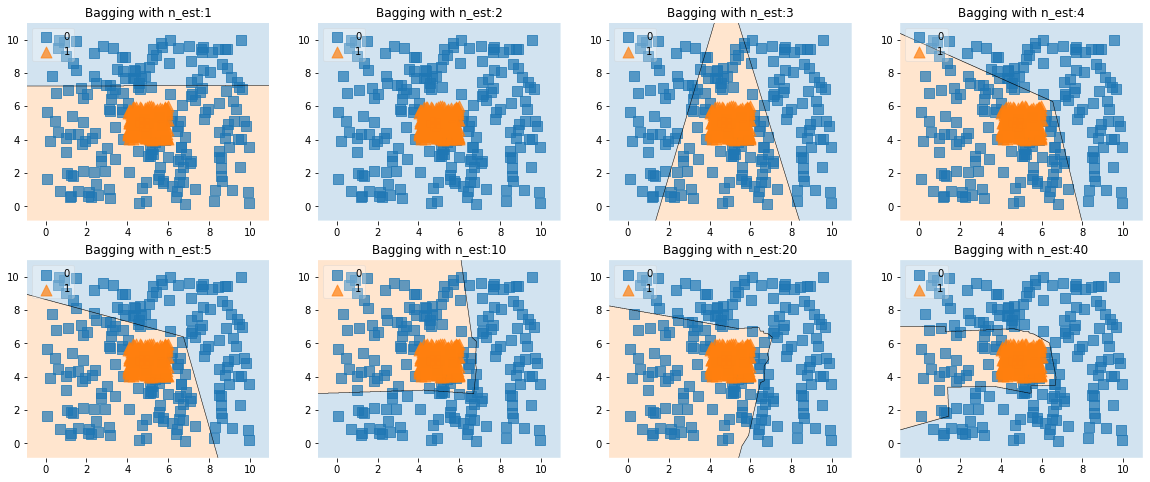

In [58]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    bagging.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=bagging, legend=2,
                                scatter_kwargs=scatter_kwargs,
                                contourf_kwargs=contourf_kwargs,
                                scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Bagging with n_est:'+str(n_est))

plt.show()

<span style="color:red">**Question 7c:** </span>
 Comment on the quality of the decision regions for a bagging classifiers with many estimators when compared to that of only one estimator.

<span style="color:green">**Answer:** </span> We will generally get better results by creating another decision tree. To do this, we can fit an ensemble of bagged decision trees with a bagging classifier. As we are increasing the n estimators the bagging classifier method is fitting a classifier on each random subset drawn from the data, then aggregates the individual predictions into one.



<span style="color:red">**Question 7d:** </span>
 **Boosting:**  Create boosting classifiers each with n_estimators = 1,2,3,4,5,10, 20, and 40. Use a **Decision Tree** (with max_depth=2) as a base classifier. Using __Data2__, compute the mean **10-fold** cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how boosting affected the mean and standard deviation of the base classifier. 

In [60]:
dt = DecisionTreeClassifier(max_depth=2)

n_est_list = [1,2,3,4,5,10,20,40]

for n_est in n_est_list:
            # create an instance of a boosting classifier with 'n_est' estimators
            boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
            # compute cross-validation accuracy for each bagging classifier
            scores = cross_val_score(boosting, Data2_X, Data2_Y, cv=10, scoring='accuracy')
            print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Boosting Accuracy: 0.88 (+/- 0.03) #estimators: 1
Boosting Accuracy: 0.88 (+/- 0.03) #estimators: 2
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 3
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 4
Boosting Accuracy: 0.92 (+/- 0.03) #estimators: 5
Boosting Accuracy: 0.92 (+/- 0.04) #estimators: 10
Boosting Accuracy: 0.91 (+/- 0.04) #estimators: 20
Boosting Accuracy: 0.91 (+/- 0.02) #estimators: 40


<span style="color:green">**Answer:** </span> Adaboost is sequentially updating two sets of weights, one to the data points and one to the weak learners. The points that are classified incorrectly are given a greater weight so the next weak learner can focus on these points. At the end of the sequence, a higher weight is given to the learners that made better predictions. This especially applies to the learners with correct predictions on the data points previous learners did not classify correctly. 

The weights given to the learners are then used as a final vote to determine the ensemble’s prediction. The main idea here is adaboost creates new classifiers by continually adjusting the distribution of the data being sampled to train next classifier.

As we are increasing the number of estimators we are getting a better mean on accuracy.



<span style="color:red">**Question 7e:** </span>
 Plot decision regions for above boosting classifiers. Explain your reason for what may have lead to the observations in __Question 7d__.

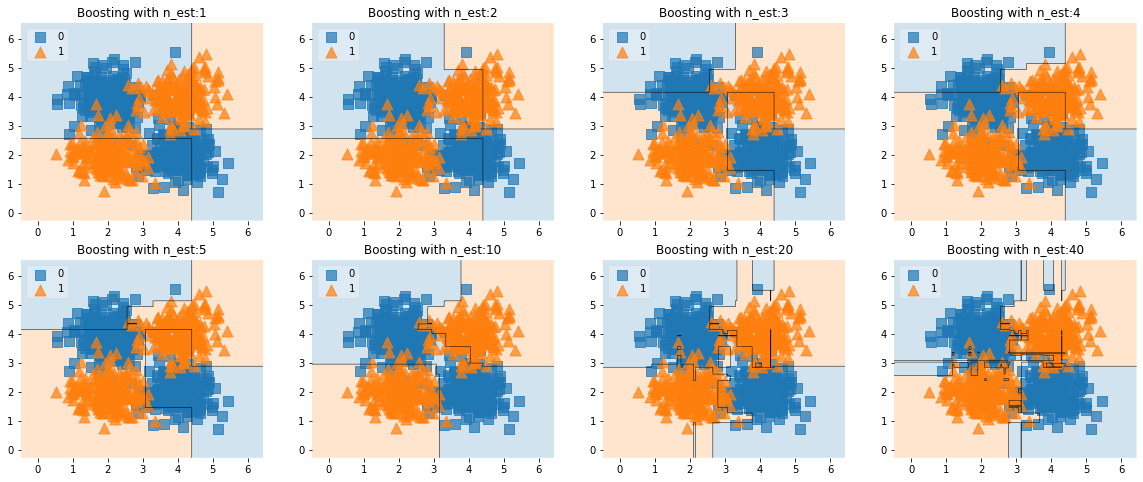

In [61]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
            count = count + 1;
            boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
            boosting.fit(Data2_X, Data2_Y)
            ax = plt.subplot(2,4,count)
            fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=boosting, legend=2,
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
            plt.title('Boosting with n_est:'+str(n_est))

plt.show()

<span style="color:green">**Answer:** </span> Adaboost is sequentially updating two sets of weights, one to the data points and one to the weak learners. The points that are classified incorrectly are given a greater weight so the next weak learner can focus on these points. At the end of the sequence, a higher weight is given to the learners that made better predictions. This especially applies to the learners with correct predictions on the data points previous learners did not classify correctly.

The weights given to the learners are then used as a final vote to determine the ensemble’s prediction. The main idea here is adaboost creates new classifiers by continually adjusting the distribution of the data being sampled to train next classifier.

As the n estimators are increasing we are seeing the performance of the classifier to be enhancing.




### 8. Classification on a real-world dataset

Real world datasets typically have many attributes making it hard to visualize. This question is about using SVM and Decision Tree algorithms on a real world 'breast cancer' dataset.

The following code reads the dataset from the 'datasets' library in sklearn.

In [62]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [63]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [64]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [65]:
X = cancer.data
Y = cancer.target

Number of samples are:

In [66]:
X.shape

(569, 30)

<span style="color:red">**Question 8a:** </span>
 Of all the SVM classifiers you explored in this hands-on exercise (i.e., linear SVM, SVM with a polynomial kernel and RBF kernel), which SVM results in a highest 10-fold cross-validation accuracy on this dataset? Explore the possible parameters for each SVM to determine the best performance for that SVM. For example, when studying linear SVM, explore a range of C values [0.001, 0.01, 0.1, 1]. Similarly for degree consider [1,2]. For gamma, consider [0.001, 0.01, 0.1, 1, 10, 100].

In [67]:
#Linear SVM
svm_linear = SVC(C=0.5, kernel='linear')

svm_linear_scores = cross_val_score(svm_linear, X, Y, cv=10, scoring='accuracy')
print(svm_linear_scores)
print([svm_linear_scores.mean(), svm_linear_scores.std()])

[0.98275862 0.93103448 0.92982456 0.94736842 0.98245614 0.96491228
 0.92982456 0.94642857 0.96428571 0.94642857]
[0.9525321925503413, 0.0192226141157179]


In [68]:
#Polynomial varying C and degree

svm_poly_1 = SVC(C=0.001, kernel='poly',degree=1, gamma = 'auto')

svm_poly_scores_1 = cross_val_score(svm_poly_1, X, Y, cv=10, scoring='accuracy')
print(svm_poly_scores_1)
print([svm_poly_scores_1.mean(), svm_poly_scores_1.std()])

[0.9137931  0.89655172 0.9122807  0.94736842 0.94736842 0.89473684
 0.98245614 0.92857143 0.89285714 0.96428571]
[0.9280269639616281, 0.02968518046820524]


In [70]:
#Polynomial varying C and degree

svm_poly_2 = SVC(C=0.01, kernel='poly',degree=1, gamma = 'auto')

svm_poly_scores_2 = cross_val_score(svm_poly_2, X, Y, cv=10, scoring='accuracy')
print(svm_poly_scores_2)
print([svm_poly_scores_2.mean(), svm_poly_scores_2.std()])


[0.93103448 0.9137931  0.94736842 0.92982456 0.98245614 0.92982456
 0.96491228 0.91071429 0.92857143 0.96428571]
[0.9402784979690605, 0.02242540044883814]


In [71]:
#Polynomial varying C and degree

svm_poly_3 = SVC(C=0.1, kernel='poly',degree=1, gamma = 'auto')

svm_poly_scores_3 = cross_val_score(svm_poly_3, X, Y, cv=10, scoring='accuracy')
print(svm_poly_scores_3)
print([svm_poly_scores_3.mean(), svm_poly_scores_3.std()])


[0.96551724 0.9137931  0.94736842 0.94736842 1.         0.94736842
 0.92982456 0.91071429 0.96428571 0.94642857]
[0.947266874081756, 0.02482952354062278]


In [72]:
#Polynomial varying C and degree

svm_poly_4 = SVC(C=1, kernel='poly',degree=1, gamma = 'auto')

svm_poly_scores_4 = cross_val_score(svm_poly_4, X, Y, cv=10, scoring='accuracy')
print(svm_poly_scores_4)
print([svm_poly_scores_4.mean(), svm_poly_scores_4.std()])

[0.96551724 0.9137931  0.94736842 0.94736842 0.98245614 0.96491228
 0.92982456 0.91071429 0.96428571 0.94642857]
[0.947266874081756, 0.02221239371835221]


In [73]:
#Polynomial varying C and degree

svm_poly_5 = SVC(C=0.001, kernel='poly',degree=2, gamma = 'auto')

svm_poly_scores_5 = cross_val_score(svm_poly_5, X, Y, cv=10, scoring='accuracy')
print(svm_poly_scores_5)
print([svm_poly_scores_5.mean(), svm_poly_scores_5.std()])

[0.98275862 0.9137931  0.9122807  0.92982456 0.96491228 0.98245614
 0.92982456 0.94642857 0.96428571 0.96428571]
[0.9490849969751964, 0.02511818448227461]


In [74]:
#Polynomial varying C and degree

svm_poly_6 = SVC(C=0.01, kernel='poly',degree=2, gamma = 'auto')

svm_poly_scores_6 = cross_val_score(svm_poly_6, X, Y, cv=10, scoring='accuracy')
print(svm_poly_scores_6)
print([svm_poly_scores_6.mean(), svm_poly_scores_6.std()])

[0.98275862 0.9137931  0.9122807  0.96491228 0.96491228 0.98245614
 0.94736842 0.94642857 1.         0.96428571]
[0.957919583441362, 0.027205751687965476]


In [75]:
#Polynomial varying C and degree

svm_poly_7 = SVC(C=0.1, kernel='poly',degree=2, gamma = 'auto')

svm_poly_scores_7 = cross_val_score(svm_poly_7, X, Y, cv=10, scoring='accuracy')
print(svm_poly_scores_7)
print([svm_poly_scores_7.mean(), svm_poly_scores_7.std()])

[0.98275862 0.9137931  0.9122807  0.96491228 0.96491228 0.98245614
 0.94736842 0.96428571 0.98214286 0.96428571]
[0.957919583441362, 0.024750796037684784]


In [76]:
#Polynomial varying C and degree

svm_poly_8 = SVC(C=1, kernel='poly',degree=2, gamma = 'auto')

svm_poly_scores_8 = cross_val_score(svm_poly_8, X, Y, cv=10, scoring='accuracy')
print(svm_poly_scores_8)
print([svm_poly_scores_8.mean(), svm_poly_scores_8.std()])

[0.98275862 0.9137931  0.92982456 0.96491228 0.96491228 0.94736842
 0.94736842 0.96428571 1.         0.96428571]
[0.9579509117621638, 0.023506830589711532]


In [ ]:
#RBF varying C and gamma
svm = SVC(C=0.001, kernel='rbf', gamma = 0.01)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.001, kernel='rbf', gamma = 0.1)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.001, kernel='poly', gamma = 1)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.01, kernel='rbf', gamma = 0.001)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.01, kernel='rbf', gamma = 0.01)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.01, kernel='rbf', gamma = 0.1)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.01, kernel='poly', gamma = 1)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.1, kernel='rbf', gamma = 0.001)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.1, kernel='rbf', gamma = 0.01)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.1, kernel='rbf', gamma = 0.1)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=0.1, kernel='poly', gamma = 1)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=1, kernel='rbf', gamma = 0.001)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=1, kernel='rbf', gamma = 0.01)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=1, kernel='rbf', gamma = 0.1)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())



svm = SVC(C=1, kernel='poly', gamma = 1)
rbf_svm_acc = cross_val_score(svm, X, Y, cv = 10, scoring='accuracy')
print('Accuracy:',rbf_svm_acc,'\n Mean:',rbf_svm_acc.mean())

<span style="color:green">**Answer:** </span> 

Linear SVM: Best accuracy for Linear SVM with C = 0.5 and an accuracy of 95.25%.

Polynomial SVM: Best accuracy C=1, degree=2, for Polynomial SVM with an accuracy of 95.79%.

RBF Polynomial: It is taking longer than usual to generate output

<span style="color:red">**Question 8b:** </span>
 Similar to __Question 8a__ explore decision trees with different max_depth to determine which values returns the best classifier.

In [ ]:
# Decision Tree Classifier- max_depth = 5
dt_5 = DecisionTreeClassifier(max_depth=5)
dt_scores_5 = cross_val_score(dt_5, X, Y, cv=20, scoring='accuracy')
print("Accuracy : ", dt_scores_5)
print("Mean : ", dt_scores_5.mean())



# Decision Tree Classifier- max_depth = 20
dt_20 = DecisionTreeClassifier(max_depth=20)
dt_scores_20 = cross_val_score(dt_20, X, Y, cv=20, scoring='accuracy')
print("Accuracy : ", dt_scores_20)
print("Mean : ", dt_scores_20.mean())



# Decision Tree Classifier- max_depth =50
dt_50 = DecisionTreeClassifier(max_depth=50)
dt_scores_50 = cross_val_score(dt_25, X, Y, cv=20, scoring='accuracy')
print("Accuracy : ", dt_scores_50)
print("Mean : ", dt_scores_50.mean())

<span style="color:green">**Answer:** </span> Generally with greater depths the accuracy should increase as we are removing the bias. THe computer is taking longer than usual here to generate the output but I speculate the performance at depth 20 will be better than both at depth 5 and depth 50



<span style="color:red">**Question 8c:** </span>
 Imagine a scenario where you are working at a cancer center as a data scientist tasked with identifying the characteristics that distinguish malignant tumors from benign tumors. Based on your knowledge of classification techniques which approach would you use and why?

<span style="color:green">**Answer:** </span> For the above scenario at hand I would use Support Vector Machines.The rationale behind it is that it is effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples. It uses a subset of training points called support vectors, so it is also memory efficient.
On top of that we can specify different Kernel functions for the decision function.
